<a href="https://colab.research.google.com/github/isabela1s/coins_counter/blob/main/MAC019_AULA09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Representação computacional de vigas:** Casos especiais

In [ ]:
# instalação do anastruct
!pip install anastruct

# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt

from anastruct import SystemElements

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 8.8 MB/s eta 0:00:00


# Vigas submetidas a carregamento horizontal

**Exemplo:**

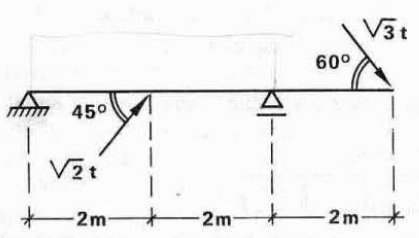

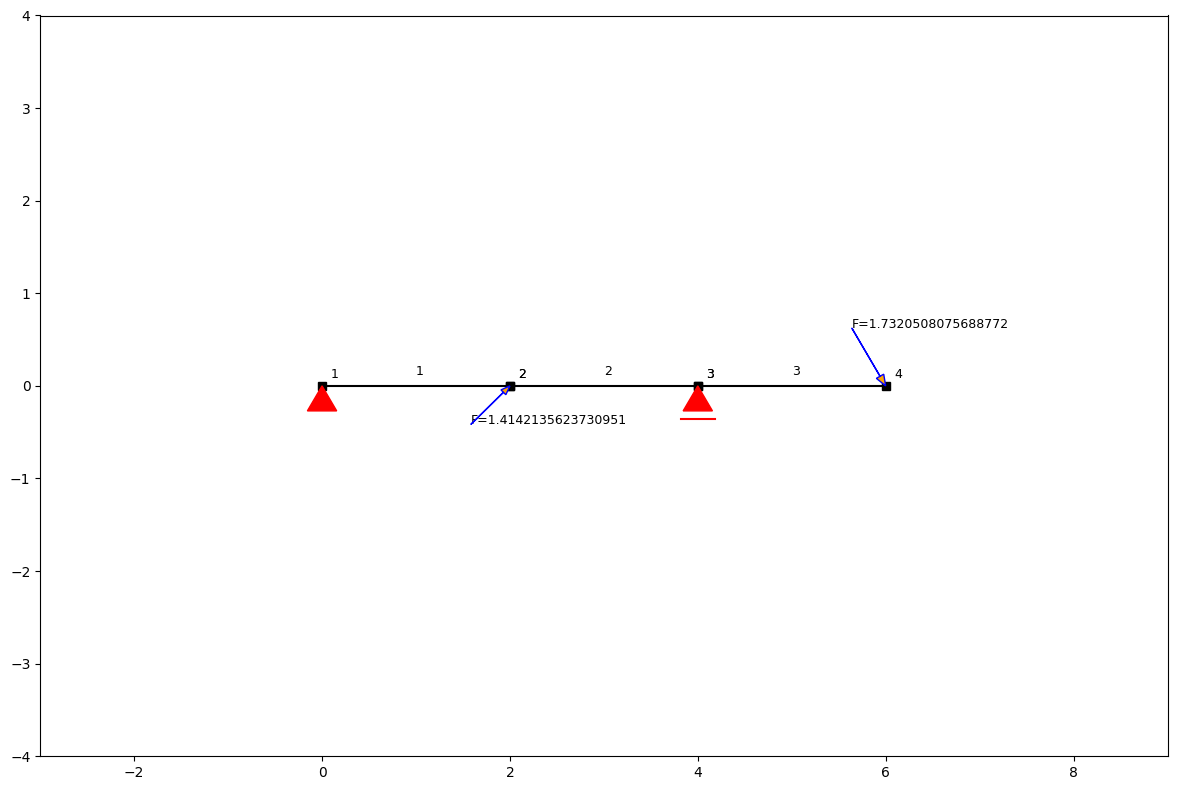

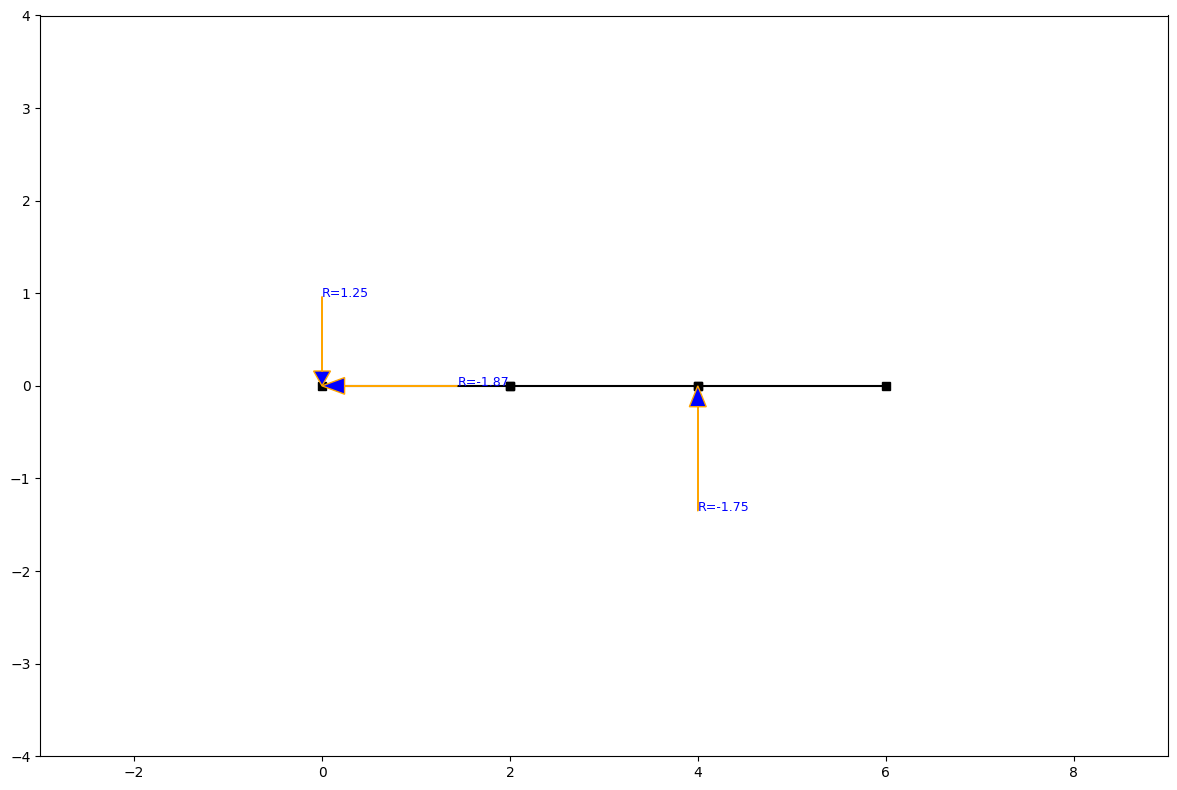

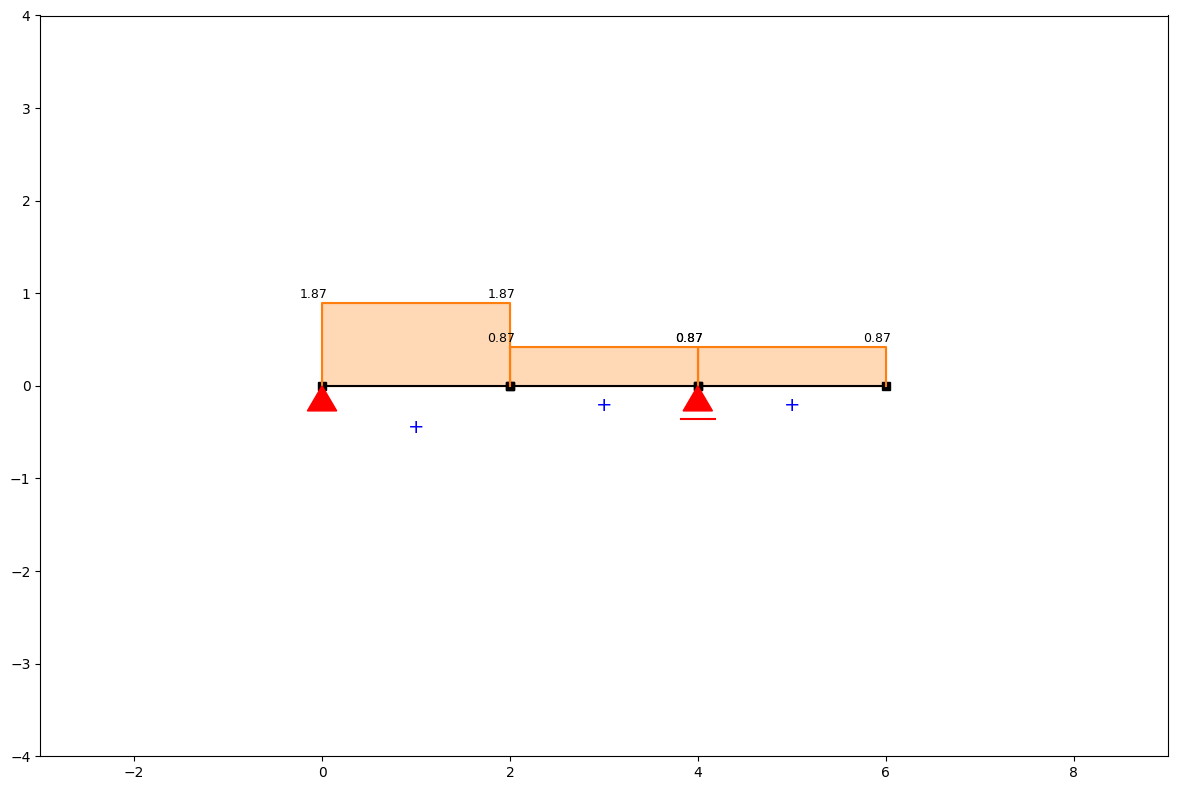

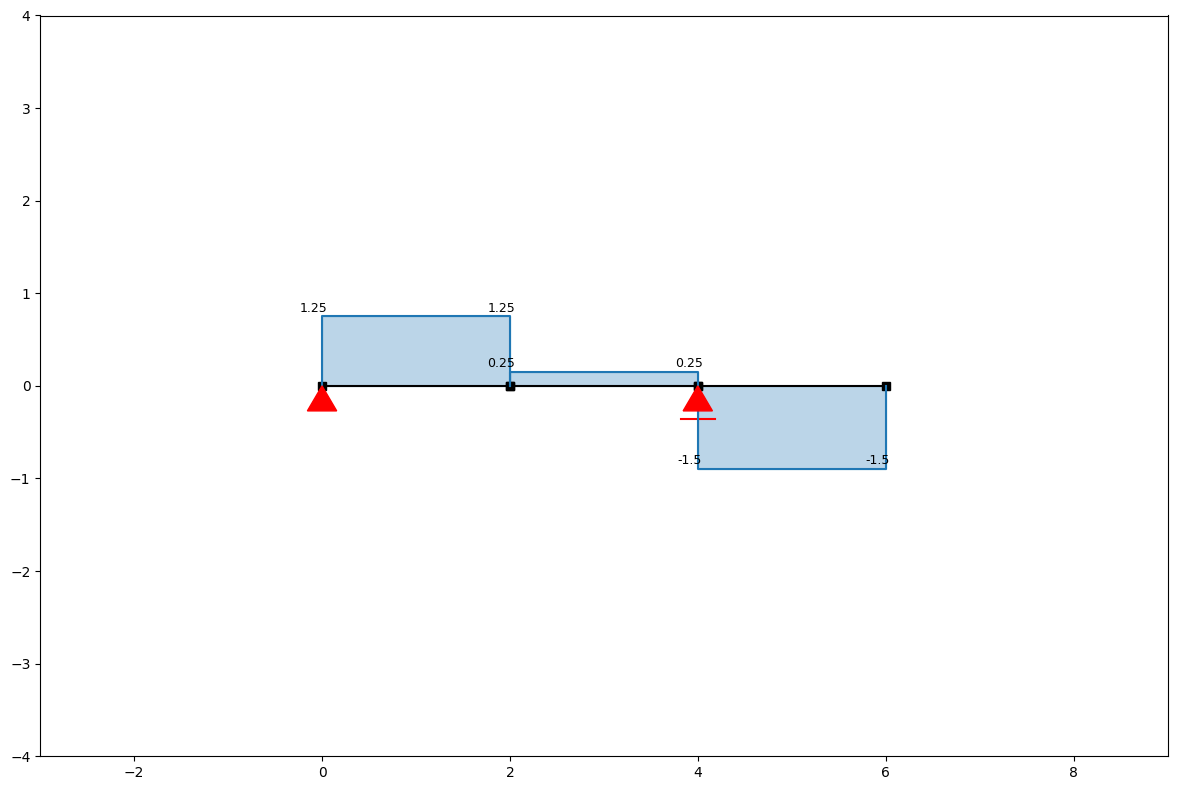

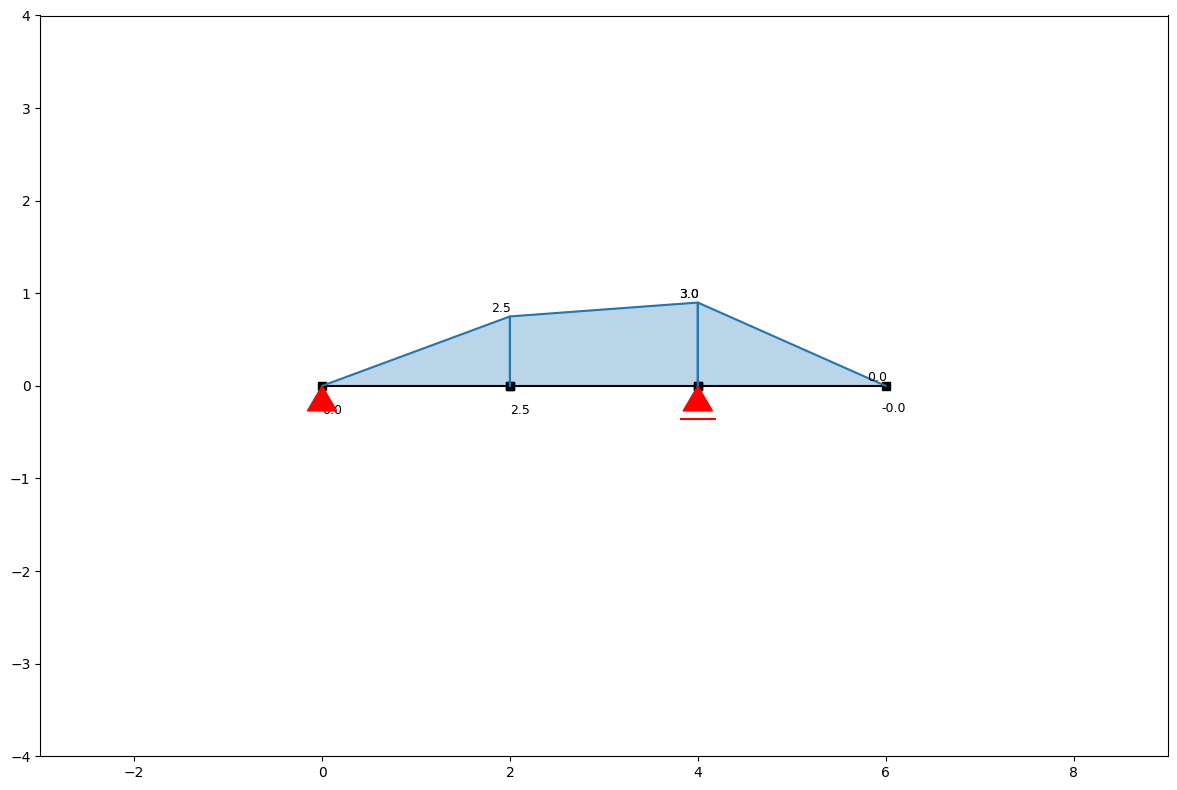

In [ ]:
# SOLUÇÃO:

ss = SystemElements()

# Definição dos elementos
elements = [
    [ [0, 0],   [2, 0] ], # elemento 1
    [ [2, 0], [4, 0] ], # elemento 2
    [ [4, 0], [6, 0] ], # elemento 3
   ]

# Definição da viga
for e in elements:
  ss.add_element(location = e)

# Apoios
ss.add_support_hinged(node_id=1)
ss.add_support_roll(node_id=3, direction='x')

# Carregamento
ss.point_load(node_id=2, Fy=np.sqrt(2), rotation=45)
ss.point_load(node_id=4, Fy=-np.sqrt(3), rotation=-30)

# 'rotation' gira a força no sentido horário; a rotação é em graus

ss.show_structure()
ss.solve()
ss.show_reaction_force()
ss.show_axial_force()
ss.show_shear_force()
ss.show_bending_moment()

# Vigas Gerber



**Exemplo:** Vigas Gerber são formadas por segmentos de vigas contínuas interligadas por rótulas internas. Como as rótulas permitem rotação livre, o momento fletor é nulo naquele ponto.

No anastruct, utilizamos spring = {1:0} (ou spring = {2:0}) na definição do elemento para representar que seu primeiro (ou segundo) nó tem momento nulo.

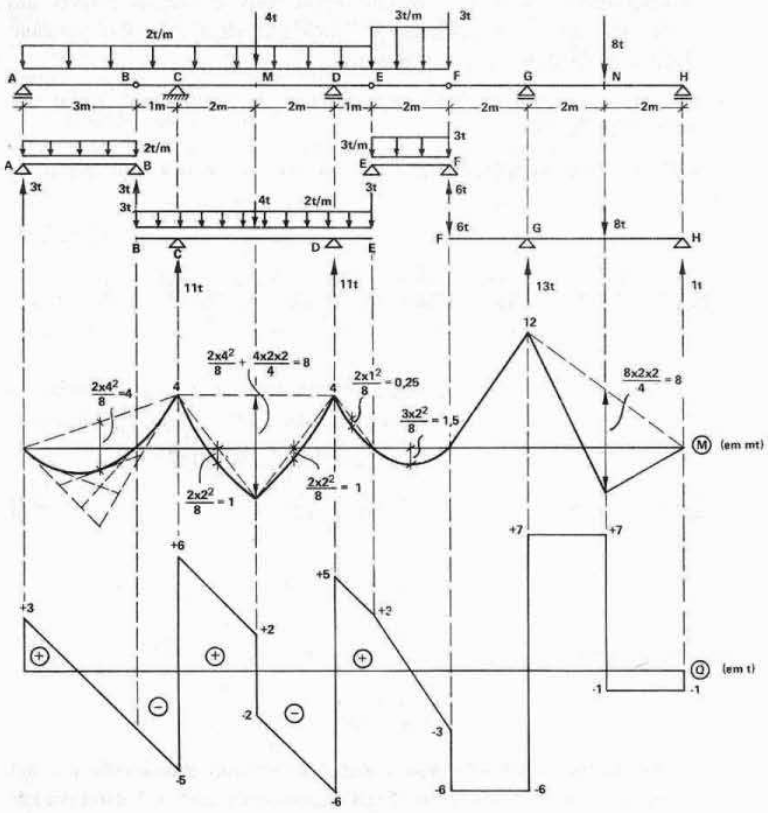

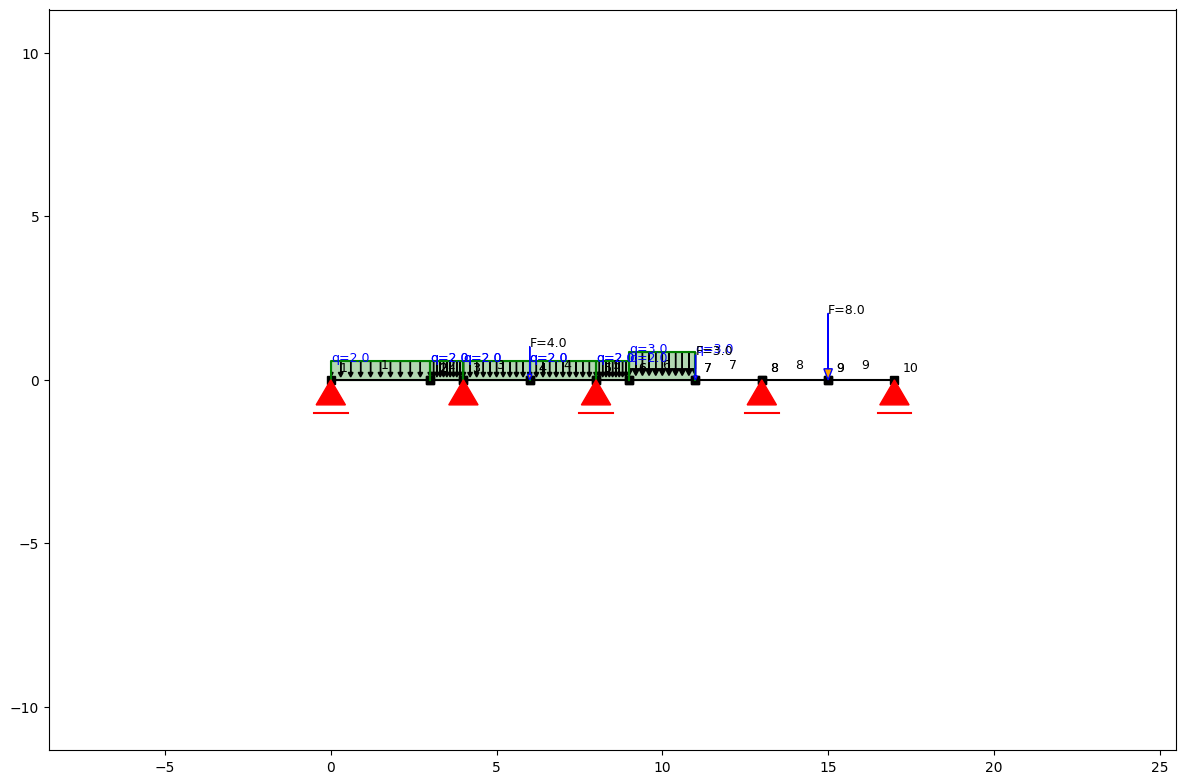

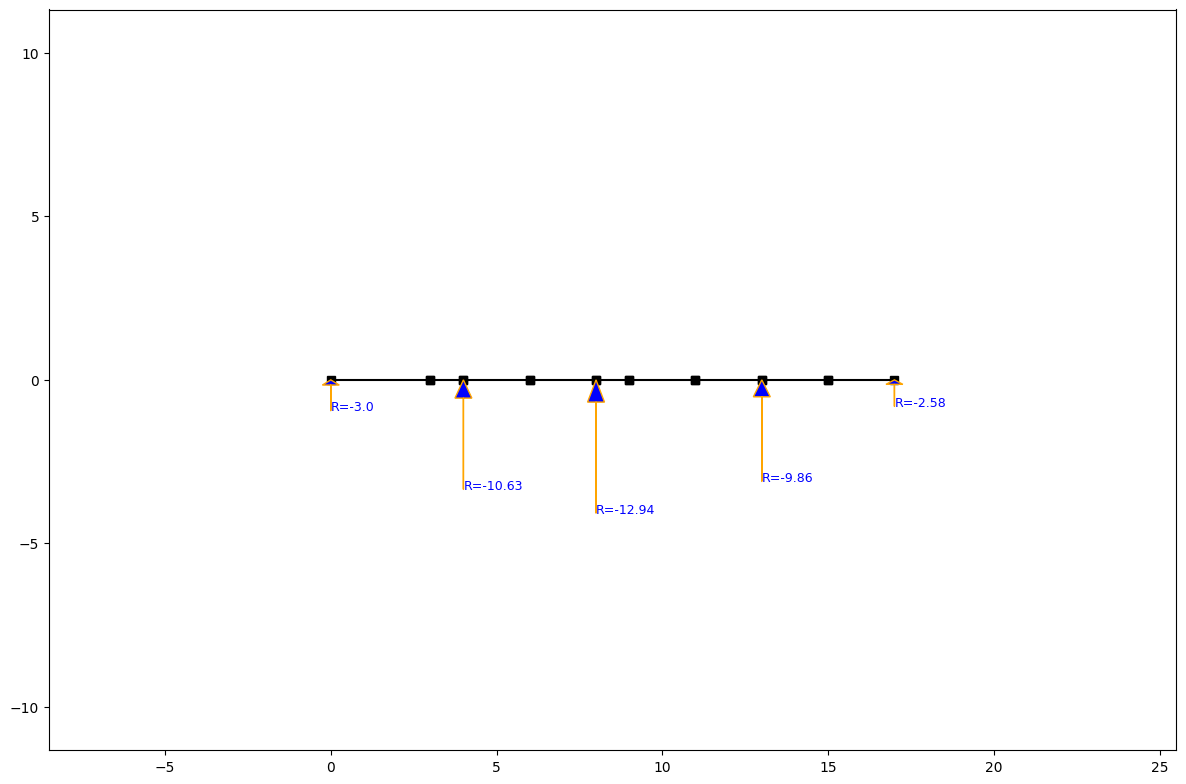

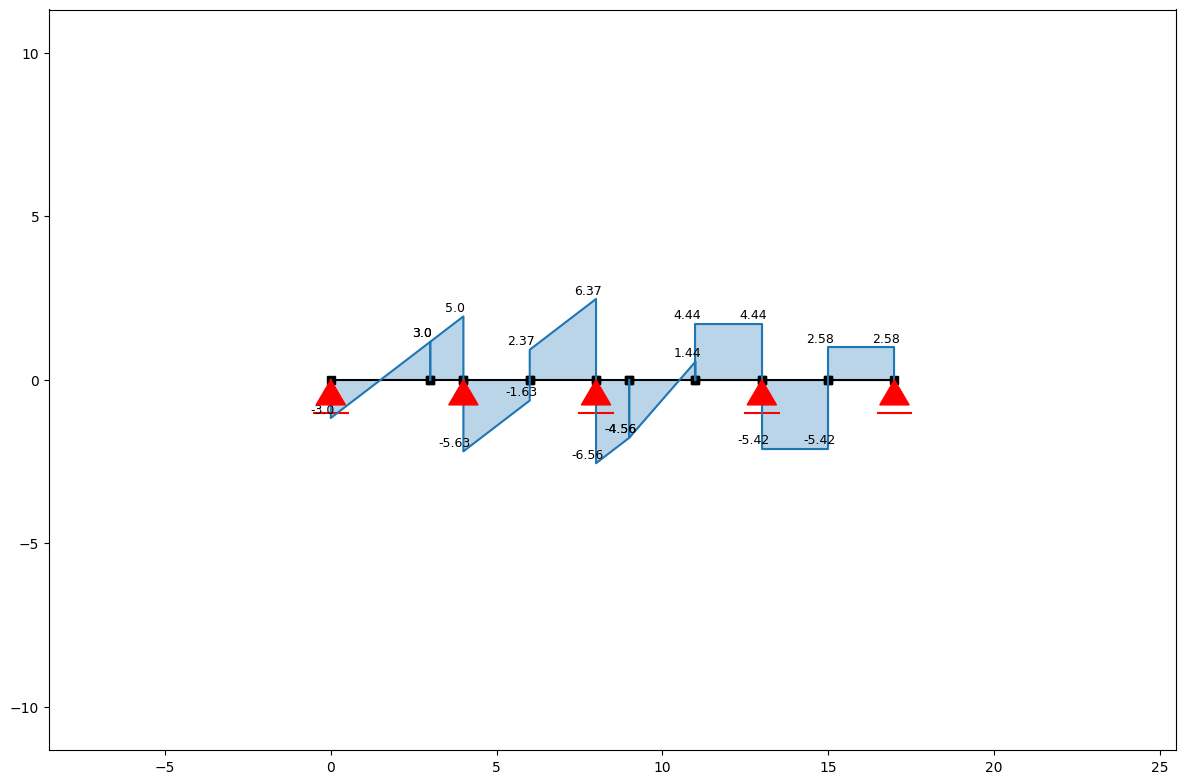

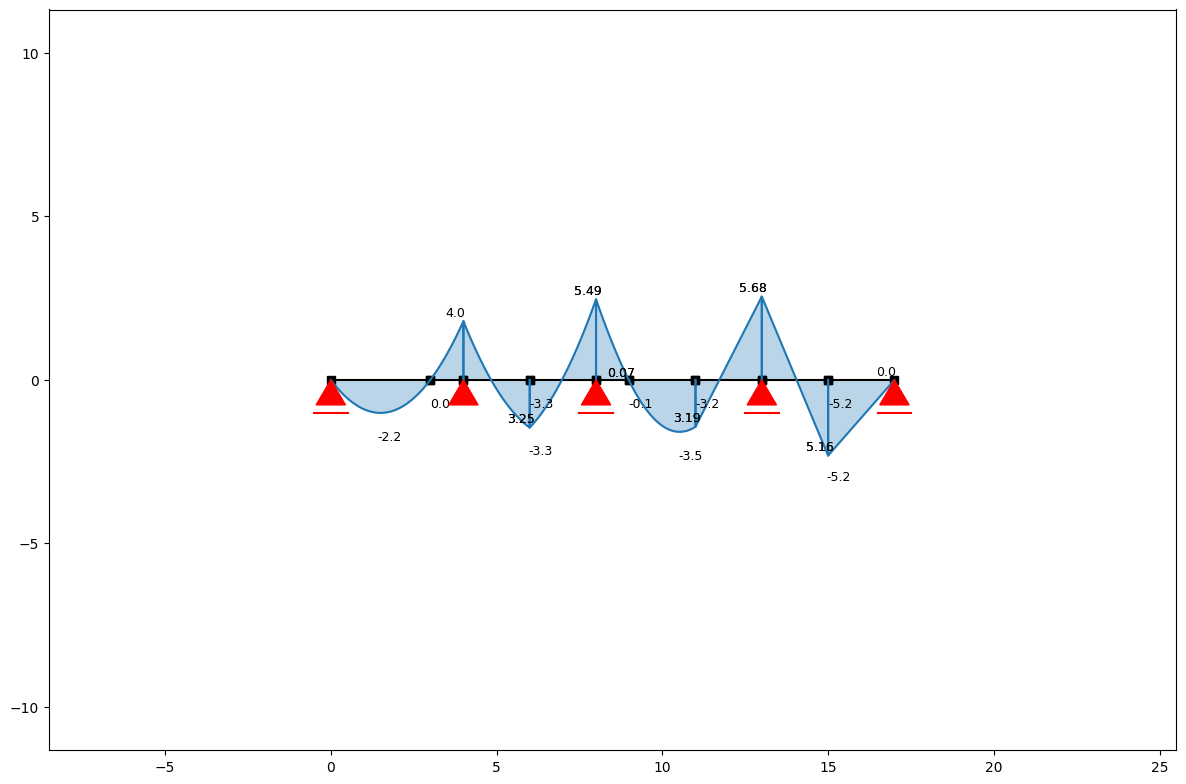

In [ ]:
# SOLUÇÃO:

ss = SystemElements()

# Elemento 1 -> AB
ss.add_element(location = [[0, 0], [3, 0]], spring = {2:0})
ss.add_support_roll(node_id=1, direction='x')
ss.q_load(q=-2, element_id=ss.id_last_element, direction='element')

# Elemento 2 -> BC
ss.add_element(location = [[3, 0], [4, 0]])
ss.add_support_hinged(node_id=ss.id_last_node)
ss.q_load(q=-2, element_id=ss.id_last_element, direction='element')

# Elemento 3 -> CM
ss.add_element(location = [[4, 0], [6, 0]])
ss.q_load(q=-2, element_id=ss.id_last_element, direction='element')
ss.point_load(node_id=ss.id_last_node, Fy=-4)

# Elemento 4 -> MD
ss.add_element(location = [[6, 0], [8, 0]])
ss.add_support_roll(node_id=ss.id_last_node, direction='x')
ss.q_load(q=-2, element_id=ss.id_last_element, direction='element')

# Elemento 5 -> DE
ss.add_element(location = [[8, 0], [9, 0]])
ss.q_load(q=-2, element_id=ss.id_last_element, direction='element')

# Elemento 6 -> EF
ss.add_element(location = [[9, 0], [11, 0]])
ss.q_load(q=-3, element_id=ss.id_last_element, direction='element')
ss.point_load(node_id=ss.id_last_node, Fy=-3)

# Elemento 7 -> FG
ss.add_element(location = [[11, 0], [13, 0]])
ss.add_support_roll(node_id=ss.id_last_node, direction='x')

# Elemento 8 -> GN
ss.add_element(location = [[13, 0], [15, 0]])
ss.point_load(node_id=ss.id_last_node, Fy=-8)

# Elemento 9 -> NH
ss.add_element(location = [[15, 0], [17, 0]])
ss.add_support_roll(node_id=ss.id_last_node, direction='x')

ss.show_structure()
ss.solve()
ss.show_reaction_force()
ss.show_shear_force()
ss.show_bending_moment()

# Vigas inclinadas

**Exemplo:** Note que, apesar do carregamento ser vertical, ao analisar o eixo da viga a decomposição do carregamento gera tanto forças perpendiculares quando normais a esse eixo.

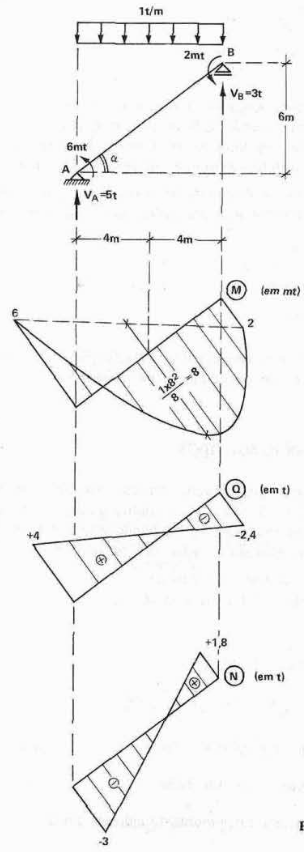

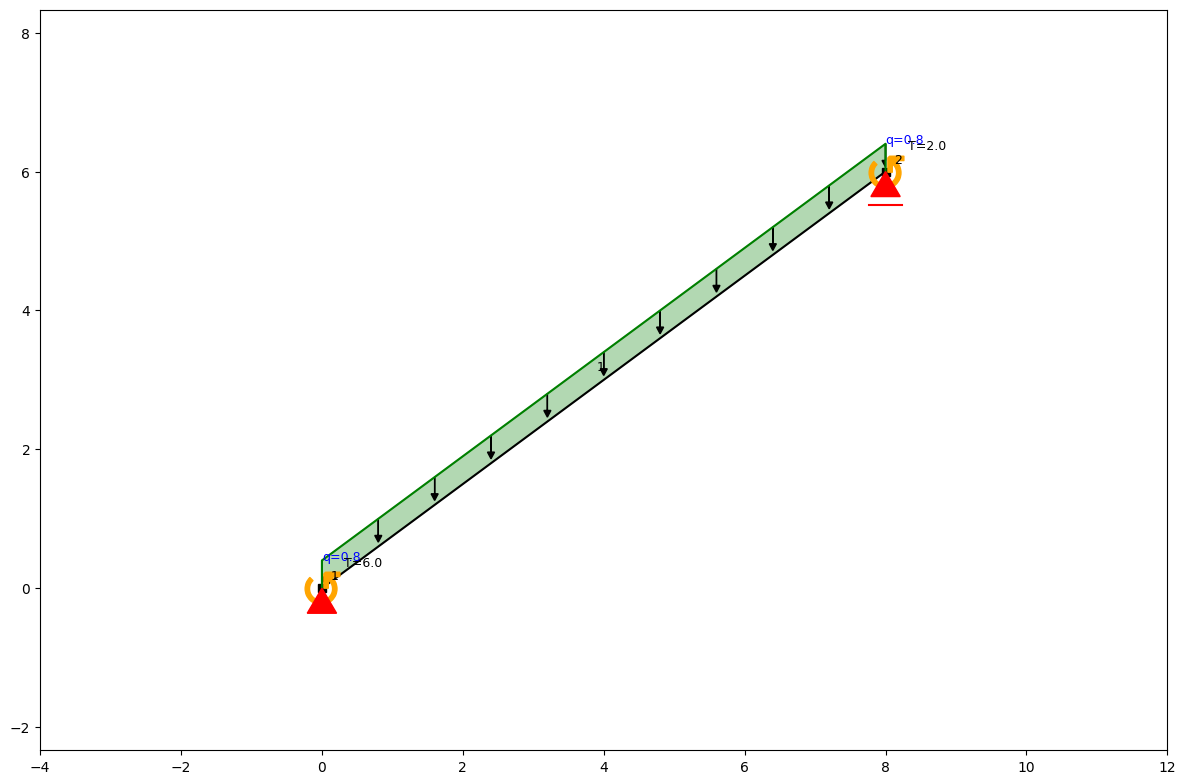

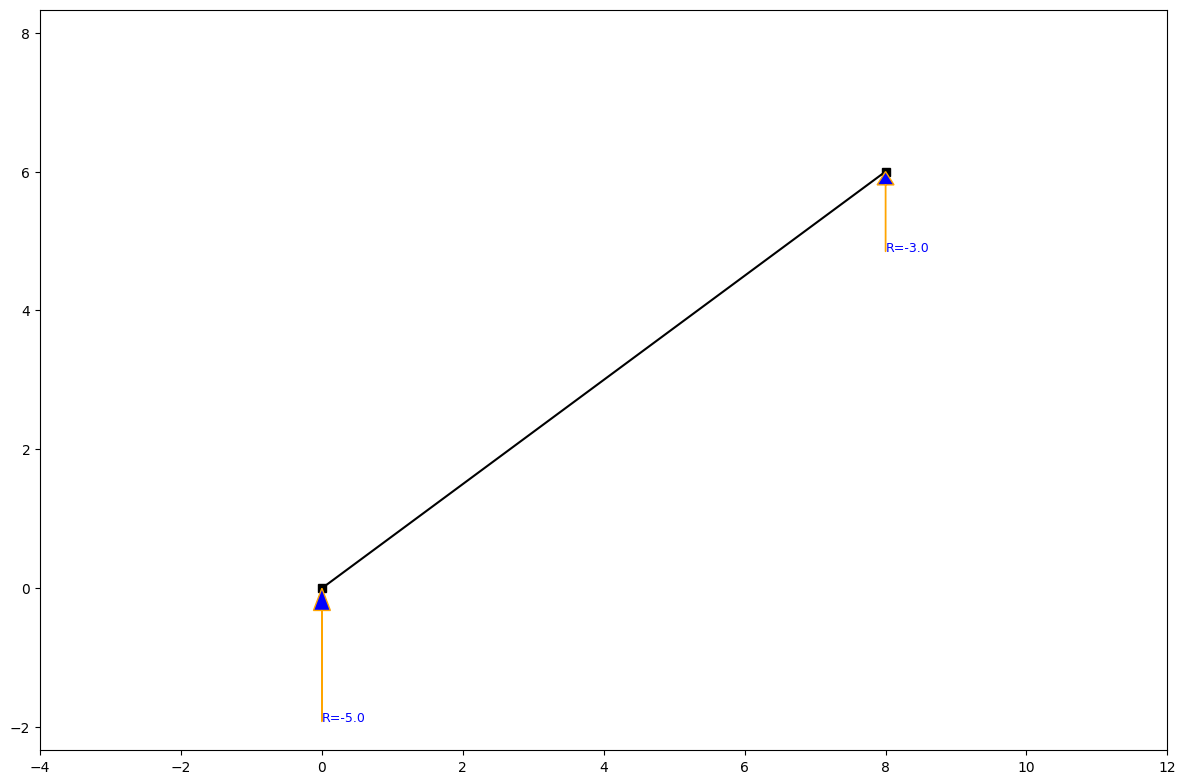

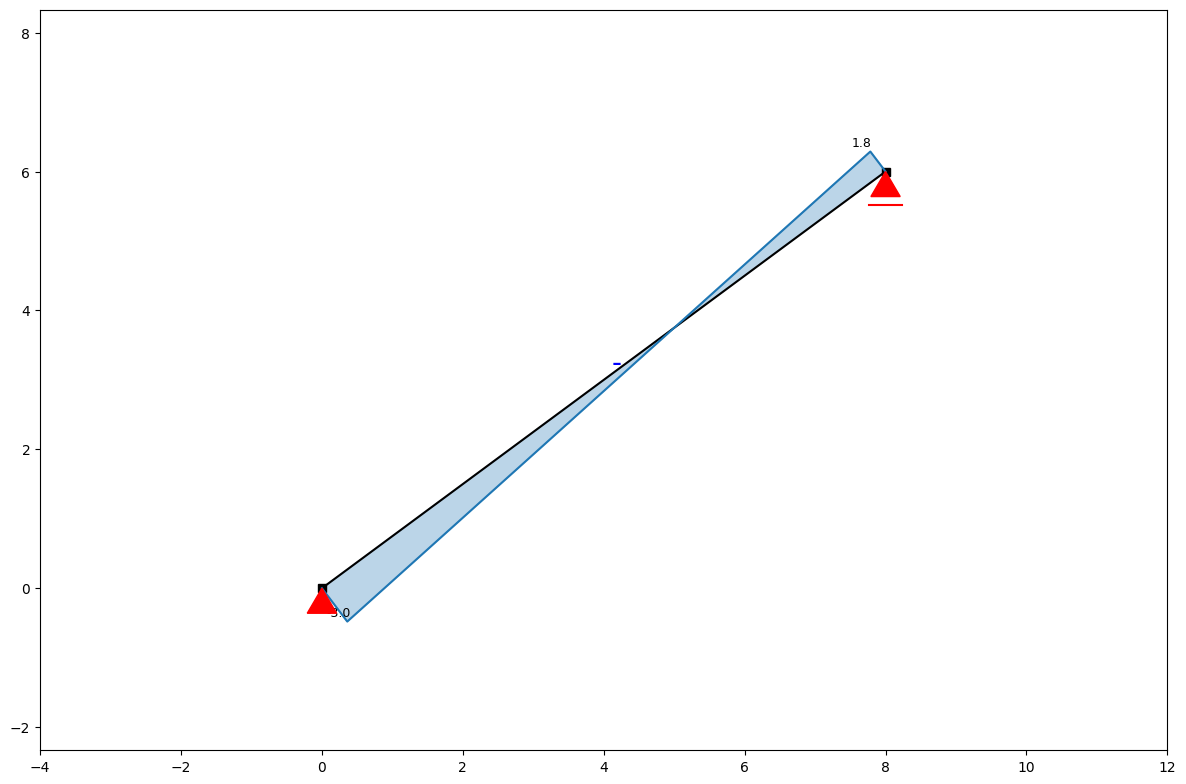

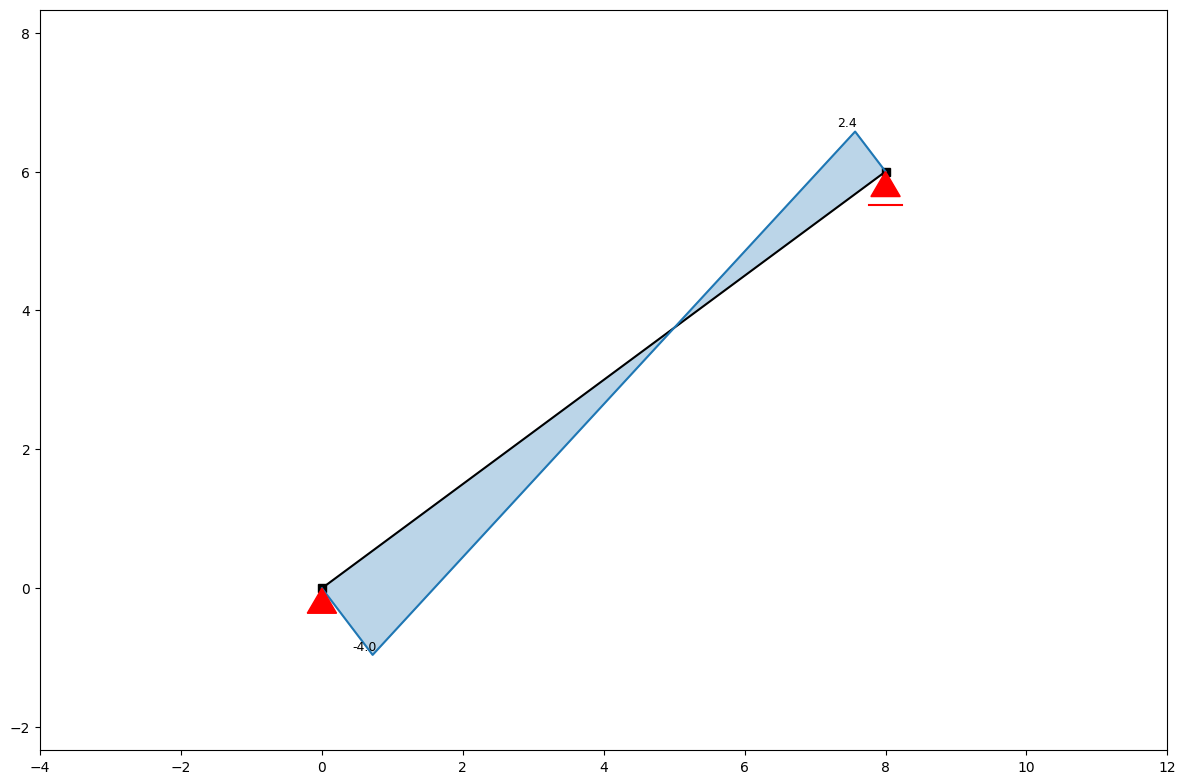

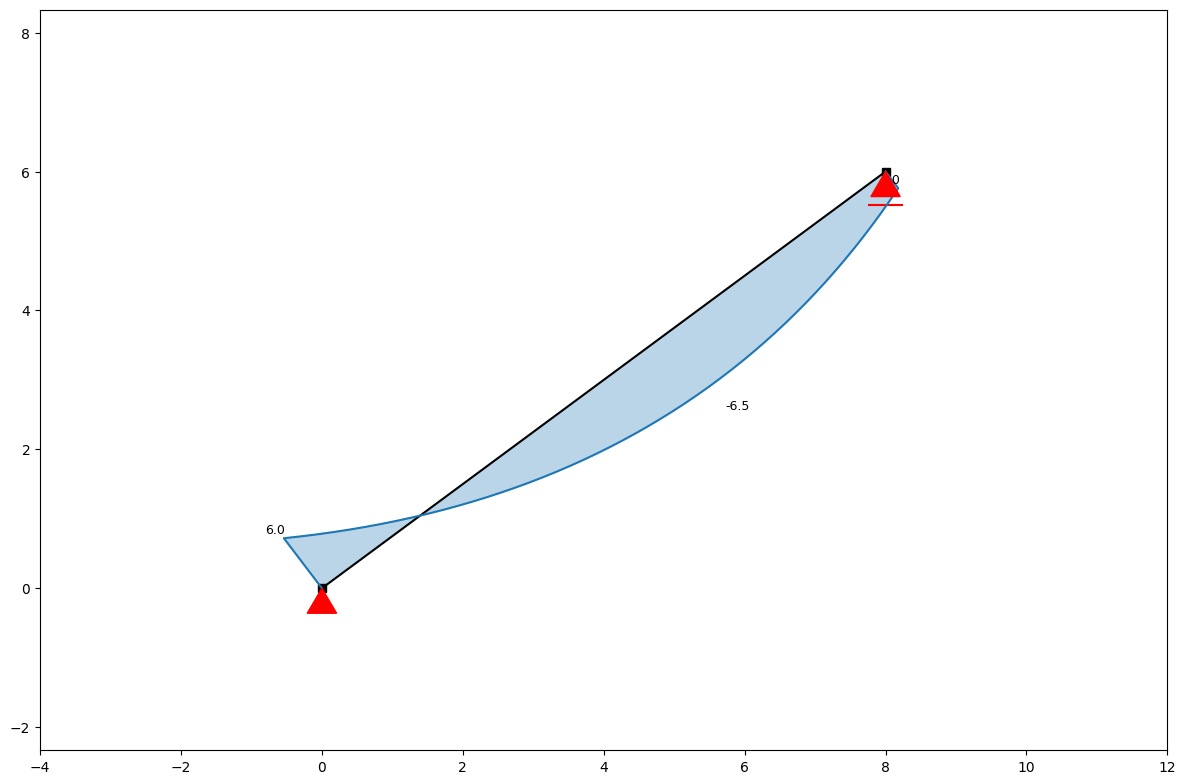

In [ ]:
# SOLUÇÃO EXEMPLO 1

ss = SystemElements()

ss.add_element(location = [[0, 0], [8, 6]])
ss.add_support_hinged(node_id=1)
ss.add_support_roll(node_id=2, direction='x')

#ss.q_load(q=-1, element_id=1, direction='element')
#ss.q_load(q=-1, element_id=1, direction='y')

L_viga = np.sqrt(8 ** 2 + 6 ** 2)
Lx = 8
q_real = -1
q_corrigido = q_real * Lx / L_viga
ss.q_load(q=q_corrigido, element_id=1, direction='y')

ss.moment_load(node_id=1, Ty=6)
ss.moment_load(node_id=2, Ty=2)

ss.show_structure()
ss.solve()
ss.show_reaction_force()
ss.show_axial_force()
ss.show_shear_force()
ss.show_bending_moment()

# Exercícios

**Exercício 1:**

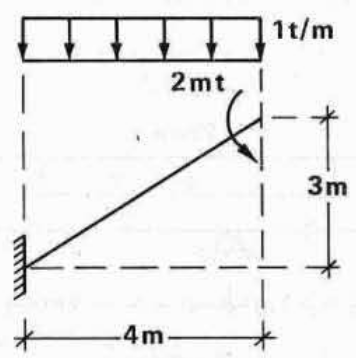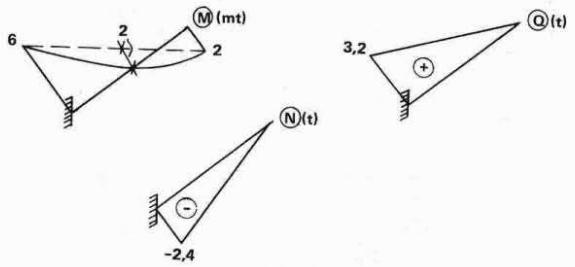

**Exercício 2:**

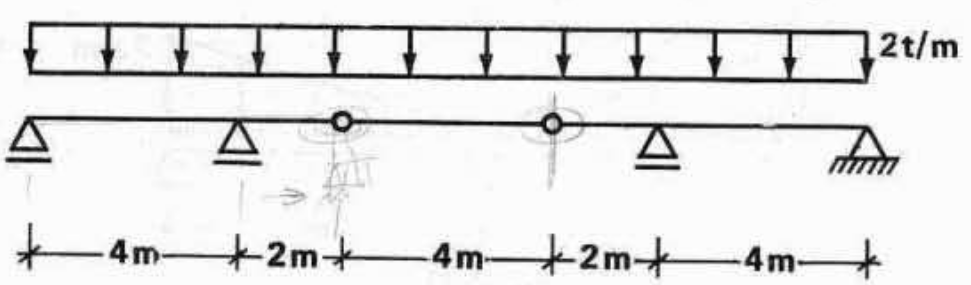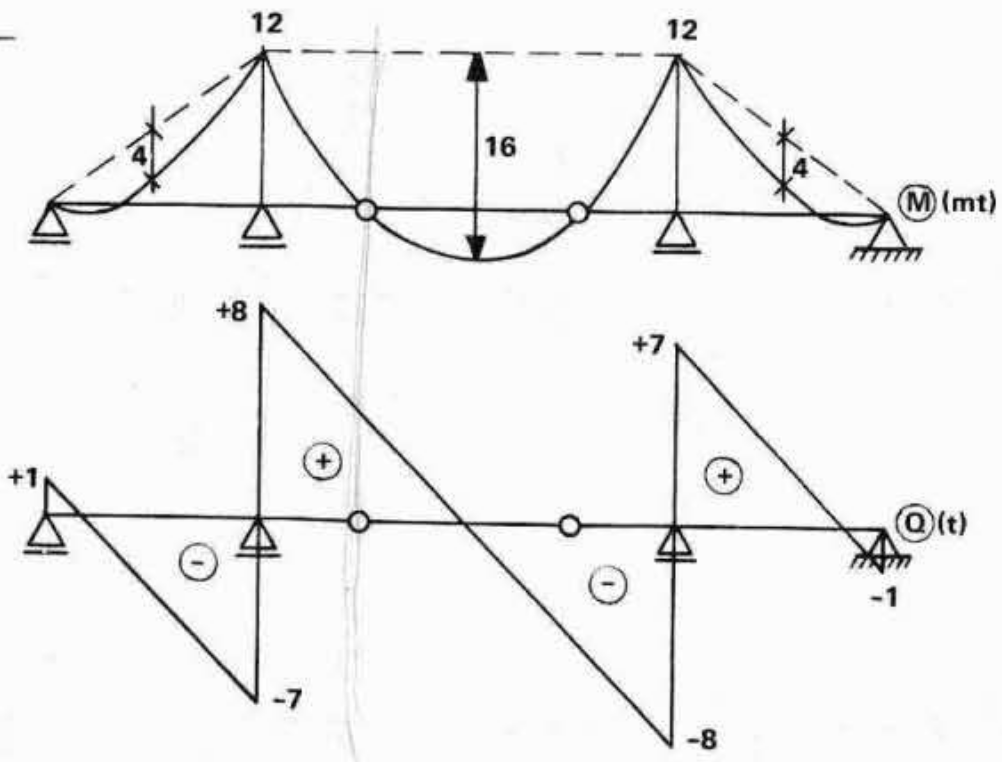